# <span style="color:purple"><center>Pytorch</center></span>

##   <span style="color:black">Profesores</span>


### Coordinador

- Campo Elías Pardo, PhD, cepardot@unal.edu.co

### Conferencistas

- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

##   <span style="color:black">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com

## <span style="color:black">Desarrollo - Replicación </span>

Nataly Ramírez Urrego (naramirezur@unal.edu.co)

## <span style="color:black">Introducción</span> 

Python es un lenguaje de programación orientado a objetos. **Todo** en Python es un objeto, con sus propiedades y métodos.

En esta sesión crearemos una red neuronal, usando `el paradigma programación orientado a objetos`, y crearemos un entrenador para entrenar la red de tal manera  que prediga el tipo de prenda del conjunto de datos mnist-fashion.

El conjunto de datos mnist-fashion, puede cargarse directamente del conjunto  de ejemplos de [Pytorch](https://pytorch.org/). En realidad este conjunto de datos muy famoso en el área de la inteligenica artificial moderna puede descargarse de varios sitios. Por facilidad en esta lección lo descargamos directamente de Pytorch.

## <span style="color:black">Instalar Pytorch </span> 

En consola ejecute el siguiente comando. 

In [ ]:
#conda install -c pytorch pytorch

## <span style="color:black">Trabajando con datos</span>

PyTorch tiene dos primitivas para trabajar con datos: `torch.utils.data.DataLoader` y `torch.utils.data.Dataset`. *Dataset* almacena las muestras y sus etiquetas correspondientes, y *DataLoader* envuelve un iterable alrededor de *Dataset*.

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

#from torch.nn import Flatten, Sequential, Linear, ReLU

PyTorch ofrece bibliotecas específicas de dominio como `TorchText`, `TorchVision` y `TorchAudio`, todas las cuales incluyen conjuntos de datos. Para este tutorial, usaremos un conjunto de datos de `TorchVision`.

El módulo `torchvision.datasets` contiene objetos de conjunto de datos para muchos datos de visión del mundo real como CIFAR, COCO ([lista completa aquí](https://pytorch.org/vision/stable/datasets.html)). En este tutorial, usamos el conjunto de datos FashionMNIST. Cada conjunto de datos de TorchVision incluye dos argumentos: *transform* y *target_transform* para modificar las muestras y las etiquetas respectivamente.

En el siguiente fragmento de código se leen los datos para entrenamiento y test. Si aún no se han bajado los datos, Pytorch lo hace por esta única ocasión. La próxima vez los leerá de la carpeta interna 'data'. El parámetro *transform* permite convertir los datos a un formato específico. En este caso a tensores de Torch.

### Crea un dataset con los datos de FashionMNIST

Si es necesario baja los datos desde el origen de Pythorch y los dja en una carpeta interna (root). Si los datos ya existen en esa carpeta, no los baja de nuevo. Primero baja los datos de entrenamiento y luego los de validación.

Se usa la transformación `ToTensor` para transformar los datos leídos en tensores de Torch.

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Baja los datos test data de open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

### Una primera imagen de los datos

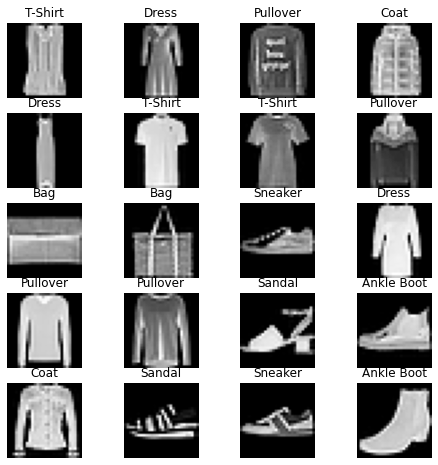

In [3]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(training_data));
    img = training_data[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[training_data[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

### Envuelve el dataset en un DataLoader

Pasamos el *Dataset* como un parámetro para `DataLoader`
Esto crea un iterable sobre nuestro conjunto de datos y admite procesamiento por lotes, muestreo, barajado y carga de datos multiproceso automáticos. Aquí definimos un tamaño de lote de 32, es decir, cada elemento en el cargador de datos iterable devolverá un lote de 64 imágenes con sus etiquetas.

In [4]:
batch_size = 32

#crea data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print('X[N, C, H, W]: ', X.shape)
    print('Shape of y: ', y.shape, y.dtype)
    break

X[N, C, H, W]:  torch.Size([32, 1, 28, 28])
Shape of y:  torch.Size([32]) torch.int64


### Instancias de clase

En el siguiente ejemplo creamos dos instancias de la clase `NeuralNetwork`.

Para crear una clase, usa el la palabra clave```class:```


In [5]:
class NeuralNetwork:
    pass

A continuación creamos dos instancias de esta clase.

In [6]:
modelo_1 = NeuralNetwork()
modelo_2 = NeuralNetwork()
print(modelo_1)

### Herencia

Es posible derivar una clase de otra, para disponer de todo el contenido de lace base. Este proceso se conice como subclassing y la técnica como herencia. 

En el siguiente fragmento derivamos la clase `NeuralNetwork` de la clase base `nn.Module`, la cual contiene toda la infraestructura básica pra implementar una red neuronal. Esto permite concentrarse en el modleos y no en los detalles de implementación básica.

In [7]:
class NeuralNetwork(nn.Module):
    pass

### Métodos y propiedades

Una clase útil debe tener datos sobre los cuales trabaja. Estos se denominan `propiedades`. Los `métodos` son la funciones internas de la clase que hacen tareas específicas.

### Constructor \_\_init\_\_()

Una función dentro de una clase de llama **método**. \_\_init\_\_ es el abreviado de **initialization** (inicialización). También se le conoce como el **constructor**.

**Note los dos guiones bajos antes y después de init**.

## <span style="color:black">Creando una red neuronal</span>

Para definir una red neuronal en PyTorch, creamos una clase que hereda de nn.Module. Definimos las capas de la red en la función __init__ y especificamos cómo pasarán los datos a través de la red en la función de reenvío. Para acelerar las operaciones en la red neuronal, lo trasladamos a la GPU si está disponible.

In [8]:
import torch
from torch import nn
from torch.nn import Flatten, Sequential, Linear, ReLU

# define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        #llama al cosntructor de la clase base
        super(NeuralNetwork, self).__init__()
        # define las capas que usará en la construcción del modelo
        self.flatten = Flatten()
        self.linear_relu_stack = Sequential(
            Linear(28*28, 512),
            ReLU(),
            Linear(512, 512),
            ReLU(),
            Linear(512, 10),
            ReLU()
        )
        
    # El método forward es la que define la estructura de la red
    # en este ejemplo aceptamos solo una entrada, pero si lo desea,
    # siéntase libre de usar más
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# instancia un objeto
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


### Nota

Cuando se invoca model, automáticamente se ejecuta la función *\_\_call\_\_* de la clase. En Pytorch la clase `nn.Module` de la cual derivamos  nuestra clase llama internamente a la función *forward*, que nosotros debemos sobrecargar (escribir para definir nuestro modelo).

## <span style="color:black">Entrenamiento de una red neuronal</span>

### Clase NeuralNetwork

Esta clase define el modelo de red neuronal.

In [9]:
from torch import nn
from torch.nn import Flatten, Sequential, Linear, ReLU

class NeuralNetwork(nn.Module):
    def __init__(self):
        
        # llama constructor de la clase base
        super(NeuralNetwork, self).__init__()
        
        # define capas de la red
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

print(NeuralNetwork())

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


### Clase Trainer

Esta clase es diseñada para controlar el proceso de entrenamiento. Antes de crear un objeto de tipo datset, asegúrese de tener disponible los siguiente objetos

1. Un modelo.
1. Un optimizador configurado para el modelo
1. Una función de pérdida adecuada para el modelo

Opcionalmente puede de un objeto SummaryWriter de Tensorboard y el path para almacenar los modelos.

Para ejecutar el método `fit` se requiere disponer de los objetos de datos para entrenamiento y validación. 

In [10]:
from datetime import datetime
from torch.nn.functional import softmax

class Trainer:
    def __init__(self, model, loss_fn, optimizer, metrics=None,
                 metric_names=None,
                 writer=None, path_to_save='',
                 learning_rate = 1e-3,
                 batch_size = 64,
                 epochs = 5, n_report= 1000):
        #################################
        # propiedades de la clase Trainer
        #################################
        # red neuronal
        self.model = model
        # función de pérdida
        self.loss_fn = loss_fn
        # optimizador
        self.optimizer = optimizer
        # métricas
        self.metrics_train = metrics
        self.metrics_valid = self.metrics_train.copy()
        self.metric_names = metric_names
        
        # writer de tensorboard 
        self.writer = writer
        
        # hiperparámetros
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.n_report = n_report
        
        # path para almacenar los modelos
        self.path_to_save = path_to_save
        # path al mejor modelo encontrado
        self.best_model = None
        
        # datos: se cargan desde la función fit
        # datos de entrenamiento
        self.training_loader = None
        # datos de validación
        self.validation_loader = None
     
    ##############################
    #  Métodos de la clase Trainer
    ##############################
    # setters              
    def set_model(self, model):
        self.model = model
    
    def set_loss(self, loss):
        self.loss = loss
        
    def set_optimizer(self, optimizer):
        self.optimizer = optimizer
        
    def set_writer(self, writer):
        self.writer =  writer
    # getters
    def get_model(self):
        return self.model
    
    
    def set_hiperparameters(self,
                 learning_rate = 1e-3,
                 batch_size = 64,
                 epochs = 5):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs        
    
    #####################################
    # métodos básicos para entrenamiento
    #####################################
    # paso de entrenamiento
    def _train_one_epoch_(self, epoch_index):
        """
        corre un paso de entrenamiento
        :params
        :epoch_index: índice de la época
        :n_report: cada cuantas iteraciones reportar en pantalla
        """
        running_loss = 0.
        last_loss = 0.
        # Aquí, usamos enumerate(training_loader) en lugar de
        # iter(training_loader) para que podamos rastrear el lote
        # indexar y hacer algunos informes dentro de la época
        for i, data in enumerate(self.training_loader):
            # Cada instancia de datos contiene parejas  input + label 
            inputs, labels = data

            # backpropagation
            # por defecto el cálculo del gradiente es acumulativo
            # comienza colocando el gradiente en cero
            self.optimizer.zero_grad()

            # Hace la predicción para este lote (batch)
            outputs = self.model(inputs)
            predicts = softmax(outputs, dim=-1)

            # Calcula la pérdida y sus gradientes
            loss = self.loss_fn(outputs, labels)
            loss.backward()

            # Ajusta los pesos del modelo 
            # w{i+1} = w{i} + learning_rate * grad(loss)
            self.optimizer.step()

            # Recolecta  datos y los reporta
            # pérdida
            running_loss += loss.item()
            # metricas
            running_metrics = self._metric_step_(predicts, labels, metric_compute=False, 
                                          validation=False)
            
            if i % self.n_report == (self.n_report-1):
                # pérdida
                last_loss = running_loss / self.n_report # pérdida promedio por lote(batch)
                running_loss = 0.
                # métricas
                last_metrics = self._metric_step_(None, None, metric_compute=True, 
                                          validation=False)
                
                # imprime pérdida del lote
                print('Pérdida en el lote {} : {}'.format(i + 1, last_loss))
                
                # imprime métricas del lote
                print_m = ''
                for j in range(len(metrics)):
                    print_m += self.metric_names[j] + ': ' + str(last_metrics[j]) + ' '
                print('Métricas en el lote {} : {}'.format(i + 1, print_m))
                
                # escribe en el writer
                if self.writer is not None:
                    tb_x = epoch_index * len(training_loader) + i + 1
                    # pérdida
                    self.writer.add_scalar('Pérdida/Entrenamiento', last_loss, tb_x)
                    # métricas
                    for i in range(len(last_metric)):
                        self.writer.add_scalar(self.metric.names[i] + '/Entrenamiento', 
                                               last_metrics[i], tb_x)
                        
                
                
    def _validation_step_(self, validation=True):
        """
        corre un paso de validación
        :params: validation=True; toma los datos de validación
        :        sino toda los datos de entrenamiento
        """
        
        if validation:
            data_loader = self.validation_loader
        else:
            data_loader = self.training_loader
        
        # Pérdida
        running_vloss = 0.0   
        for i, vdata in enumerate(data_loader):
            vinputs, vlabels = vdata
            voutputs = self.model(vinputs)
            vpredicts = softmax(voutputs,dim=-1)
            vloss = self.loss_fn(voutputs, vlabels)
            
            running_vloss += vloss
            _  = self._metric_step_(vpredicts, vlabels, 
                            metric_compute=False, validation= validation)

        avg_vloss = running_vloss / (i + 1)
        v_metrics =   self._metric_step_(None, None, metric_compute=True, 
                                          validation= validation)
        
        return avg_vloss, v_metrics
        
    def _metric_step_(self, predicts, labels, metric_compute=False, validation=False):
        """
        actualiza y calcula las métricas
        """            
                
        if validation:
            metrics = self.metrics_valid
        else:
            metrics = self.metrics_train
        
        if predicts is not None and labels is not None:
            for i, metric in enumerate(metrics):
                metrics[i].update(predicts, labels)
        
        if metric_compute:
            values = [metric.compute().item() for metric in metrics]
            for metric in metrics:
                metric.reset() 
        else:
            values = [metric(predicts, labels).item() for metric in metrics]
    
        return values
      
    
    # ciclo de entrenamiento
    def _train_loop_(self):
        # registra marca  de tiempo
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        # contador de epochs
        epoch_number = 0

        # Inicializa la mejor pérdida en un valor muy grande
        # el propósito es mejorar esta mejor pérdida
        best_vloss = 1_000_000.
        
         
        # ciclo de entrenamiento
        for epoch in range(self.epochs):
            print('época {}:'.format(epoch_number + 1))
            
            # paso de entrenamiento
            # coloca en modelo en modo entrenamiento 
            model.train(True)
            # lanza un paso de entrenamiento
            self._train_one_epoch_(epoch_number)

            # paso de validación 
            # coloca el modelo en modo inferencia
            self.model.train(False)
            
            # lanza un paso de validación
            e_loss, e_metrics = self._validation_step_(validation=False)
            v_loss, v_metrics = self._validation_step_(validation=True)
            
            # imprime pérdida dela época
            print('Pérdida entrenamiento: {}, validación {}'.format(e_loss, v_loss))
            
            # imprime métricas del lote la época
            print_m_e = ''
            for i in range(len(e_metrics)):
                print_m_e += self.metric_names[i] + ': ' + str(e_metrics[i]) + ' '
            print_m_v = ''
            for i in range(len(v_metrics)):
                print_m_v += self.metric_names[i] + ': ' + str(v_metrics[i]) + ' '     
            print('Métricas en entrenamiento : {}, validación {} '.format(print_m_e, print_m_v))

            # Registra (log) la pérdida actual promedio  por lote (batch)
            # para entrenamiento y validación
            if self.writer is not None:
                # pérdida
                self.writer.add_scalars('Pérdida entrenamiento v.s. Pérdida validación',
                                { 'Entrenamiento' : e_loss, 'Validación' : e_vloss },
                                epoch_number + 1)
                
                # métricas
                for i in range(len(e_metrics)):  
                    self.writer.add_scalars(self.metric.names[i] + 'entrenamiento v.s. validación',
                                { 'Entrenamiento' : e_metrics[i], 'Validación' : v_metrics[i] },
                                epoch_number + 1)
                  
                self.writer.flush()

            # Realice un seguimiento del mejor rendimiento y guarda el estado del modelo
            if  v_loss < best_vloss:
                best_vloss = v_loss
                model_path = self.path_to_save + 'model_{}_{}'.format(timestamp, epoch_number)
                torch.save(model.state_dict(), model_path)
                self.path_best_model = model_path

            epoch_number += 1 
        """
        calculo final de pérdida y métric no se requiere
        """
       
                    
            
    def fit(self, train_data, val_data, epochs=None, writer=None, best_loss=True):
        if writer is not None:
            self.writer = writer
        if epochs is not None:
            self.epochs = epochs
       # datos de entrenamiento
        self.training_loader = train_data
        # datos de validación
        self.validation_loader = val_data
        
        # lanza loop de entrenamiento
        self._train_loop_()
        # carga al modelo los pesos con mejor pérdida
        if best_loss:
            self.model.load_state_dict(torch.load(self.path_best_model))
        from datetime import datetime
from torch.nn.functional import softmax

class Trainer:
    def __init__(self, model, loss_fn, optimizer, metrics=None,
                 metric_names=None,
                 writer=None, path_to_save='',
                 learning_rate = 1e-3,
                 batch_size = 64,
                 epochs = 5, n_report= 1000):
        #################################
        # propiedades de la clase Trainer
        #################################
        # red neuronal
        self.model = model
        # función de pérdida
        self.loss_fn = loss_fn
        # optimizador
        self.optimizer = optimizer
        # métricas
        self.metrics_train = metrics
        self.metrics_valid = self.metrics_train.copy()
        self.metric_names = metric_names
        
        # writer de tensorboard 
        self.writer = writer
        
        # hiperparámetros
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.n_report = n_report
        
        # path para almacenar los modelos
        self.path_to_save = path_to_save
        # path al mejor modelo encontrado
        self.best_model = None
        
        # datos: se cargan desde la función fit
        # datos de entrenamiento
        self.training_loader = None
        # datos de validación
        self.validation_loader = None
     
    ##############################
    #  Métodos de la clase Trainer
    ##############################
    # setters              
    def set_model(self, model):
        self.model = model
    
    def set_loss(self, loss):
        self.loss = loss
        
    def set_optimizer(self, optimizer):
        self.optimizer = optimizer
        
    def set_writer(self, writer):
        self.writer =  writer
    # getters
    def get_model(self):
        return self.model
    
    
    def set_hiperparameters(self,
                 learning_rate = 1e-3,
                 batch_size = 64,
                 epochs = 5):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs        
    
    #####################################
    # métodos básicos para entrenamiento
    #####################################
    # paso de entrenamiento
    def _train_one_epoch_(self, epoch_index):
        """
        corre un paso de entrenamiento
        :params
        :epoch_index: índice de la época
        :n_report: cada cuantas iteraciones reportar en pantalla
        """
        running_loss = 0.
        last_loss = 0.
        # Aquí, usamos enumerate(training_loader) en lugar de
        # iter(training_loader) para que podamos rastrear el lote
        # indexar y hacer algunos informes dentro de la época
        for i, data in enumerate(self.training_loader):
            # Cada instancia de datos contiene parejas  input + label 
            inputs, labels = data

            # backpropagation
            # por defecto el cálculo del gradiente es acumulativo
            # comienza colocando el gradiente en cero
            self.optimizer.zero_grad()

            # Hace la predicción para este lote (batch)
            outputs = self.model(inputs)
            predicts = softmax(outputs, dim=-1)

            # Calcula la pérdida y sus gradientes
            loss = self.loss_fn(outputs, labels)
            loss.backward()

            # Ajusta los pesos del modelo 
            # w{i+1} = w{i} + learning_rate * grad(loss)
            self.optimizer.step()

            # Recolecta  datos y los reporta
            # pérdida
            running_loss += loss.item()
            # metricas
            running_metrics = self._metric_step_(predicts, labels, metric_compute=False, 
                                          validation=False)
            
            if i % self.n_report == (self.n_report-1):
                # pérdida
                last_loss = running_loss / self.n_report # pérdida promedio por lote(batch)
                running_loss = 0.
                # métricas
                last_metrics = self._metric_step_(None, None, metric_compute=True, 
                                          validation=False)
                
                # imprime pérdida del lote
                print('Pérdida en el lote {} : {}'.format(i + 1, last_loss))
                
                # imprime métricas del lote
                print_m = ''
                for j in range(len(metrics)):
                    print_m += self.metric_names[j] + ': ' + str(last_metrics[j]) + ' '
                print('Métricas en el lote {} : {}'.format(i + 1, print_m))
                
                # escribe en el writer
                if self.writer is not None:
                    tb_x = epoch_index * len(training_loader) + i + 1
                    # pérdida
                    self.writer.add_scalar('Pérdida/Entrenamiento', last_loss, tb_x)
                    # métricas
                    for i in range(len(last_metric)):
                        self.writer.add_scalar(self.metric.names[i] + '/Entrenamiento', 
                                               last_metrics[i], tb_x)
                        
                
                
    def _validation_step_(self, validation=True):
        """
        corre un paso de validación
        :params: validation=True; toma los datos de validación
        :        sino toda los datos de entrenamiento
        """
        
        if validation:
            data_loader = self.validation_loader
        else:
            data_loader = self.training_loader
        
        # Pérdida
        running_vloss = 0.0   
        for i, vdata in enumerate(data_loader):
            vinputs, vlabels = vdata
            voutputs = self.model(vinputs)
            vpredicts = softmax(voutputs,dim=-1)
            vloss = self.loss_fn(voutputs, vlabels)
            
            running_vloss += vloss
            _  = self._metric_step_(vpredicts, vlabels, 
                            metric_compute=False, validation= validation)

        avg_vloss = running_vloss / (i + 1)
        v_metrics =   self._metric_step_(None, None, metric_compute=True, 
                                          validation= validation)
        
        return avg_vloss, v_metrics
        
    def _metric_step_(self, predicts, labels, metric_compute=False, validation=False):
        """
        actualiza y calcula las métricas
        """            
                
        if validation:
            metrics = self.metrics_valid
        else:
            metrics = self.metrics_train
        
        if predicts is not None and labels is not None:
            for i, metric in enumerate(metrics):
                metrics[i].update(predicts, labels)
        
        if metric_compute:
            values = [metric.compute().item() for metric in metrics]
            for metric in metrics:
                metric.reset() 
        else:
            values = [metric(predicts, labels).item() for metric in metrics]
    
        return values
      
    
    # ciclo de entrenamiento
    def _train_loop_(self):
        # registra marca  de tiempo
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        # contador de epochs
        epoch_number = 0

        # Inicializa la mejor pérdida en un valor muy grande
        # el propósito es mejorar esta mejor pérdida
        best_vloss = 1_000_000.
        
         
        # ciclo de entrenamiento
        for epoch in range(self.epochs):
            print('época {}:'.format(epoch_number + 1))
            
            # paso de entrenamiento
            # coloca en modelo en modo entrenamiento 
            model.train(True)
            # lanza un paso de entrenamiento
            self._train_one_epoch_(epoch_number)

            # paso de validación 
            # coloca el modelo en modo inferencia
            self.model.train(False)
            
            # lanza un paso de validación
            e_loss, e_metrics = self._validation_step_(validation=False)
            v_loss, v_metrics = self._validation_step_(validation=True)
            
            # imprime pérdida dela época
            print('Pérdida entrenamiento: {}, validación {}'.format(e_loss, v_loss))
            
            # imprime métricas del lote la época
            print_m_e = ''
            for i in range(len(e_metrics)):
                print_m_e += self.metric_names[i] + ': ' + str(e_metrics[i]) + ' '
            print_m_v = ''
            for i in range(len(v_metrics)):
                print_m_v += self.metric_names[i] + ': ' + str(v_metrics[i]) + ' '     
            print('Métricas en entrenamiento : {}, validación {} '.format(print_m_e, print_m_v))

            # Registra (log) la pérdida actual promedio  por lote (batch)
            # para entrenamiento y validación
            if self.writer is not None:
                # pérdida
                self.writer.add_scalars('Pérdida entrenamiento v.s. Pérdida validación',
                                { 'Entrenamiento' : e_loss, 'Validación' : e_vloss },
                                epoch_number + 1)
                
                # métricas
                for i in range(len(e_metrics)):  
                    self.writer.add_scalars(self.metric.names[i] + 'entrenamiento v.s. validación',
                                { 'Entrenamiento' : e_metrics[i], 'Validación' : v_metrics[i] },
                                epoch_number + 1)
                  
                self.writer.flush()

            # Realice un seguimiento del mejor rendimiento y guarda el estado del modelo
            if  v_loss < best_vloss:
                best_vloss = v_loss
                model_path = self.path_to_save + 'model_{}_{}'.format(timestamp, epoch_number)
                torch.save(model.state_dict(), model_path)
                self.path_best_model = model_path

            epoch_number += 1 
        """
        calculo final de pérdida y métric no se requiere
        """
       
                    
            
    def fit(self, train_data, val_data, epochs=None, writer=None, best_loss=True):
        if writer is not None:
            self.writer = writer
        if epochs is not None:
            self.epochs = epochs
       # datos de entrenamiento
        self.training_loader = train_data
        # datos de validación
        self.validation_loader = val_data
        
        # lanza loop de entrenamiento
        self._train_loop_()
        # carga al modelo los pesos con mejor pérdida
        if best_loss:
            self.model.load_state_dict(torch.load(self.path_best_model))

### Clase Data

Clase contenedora de datos


In [11]:
from torch.utils.data import DataLoader

class Data():
    """
    Esta clase recibe un dataset, y lo envuelve en un dataloader
    
    :
    se definen getter y setter para la propiedad data
    """
    def __init__(self, dataset=None, batch_size=64, shuffle=True):
        """
        :params: dataset: opcional dataset incial inicial
        :batch_size: tamaño de los lotes de datos para el Dataloader
        :shuffle: True= mezclar los datos aleatoriamente (para entranamiento)
        """     
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self._data = DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)
    
    # getter
    def get_data(self):
        return self._data
    
    # setter
    def set_data(self, dataset):
        self._dataset = dataset
        self._data = DataLoader(self._dataset, batch_size=self.batch_size, shuffle=self.shuffle)
    
    # crea la propiedad data
    data = property(get_data, set_data)
    
    def __len__(self):
        return len(self._data)

### Clase Drawer


Esta es una clase auxiliar que usaremos para desplegar ejemplos de los objetos en pantalla

In [12]:
import matplotlib.pyplot as plt
import numpy as np

class Drawer:
    """
    Clase utilitaria para deplegar imágenes en línea
    asumimos que los datos no están listos para ser desplegados
    Por ejemplo si tiene los datos normalizados revierta el proceso
    
    """    
    def __init__(self, dataset, label_names, rows=5, columns=4, figsize=(8,8)):
        
        """
        :params
        : data_set: dtaset de datos
        : label_names: nombres asociados a las  la etiquetas de los datos
        : rows: número de filas e¿del gráfico
        : columns: núemro de columnas del gráfico
        """
        self.dataset = dataset
        self.label_names = label_names
        self.rows = rows
        self.columns = columns
        self.figsize = figsize
    
    def plot(self):
        fig = plt.figure(figsize=self.figsize);
        
        for i in range(1, self.columns * self.rows +1):
            img_xy = np.random.randint(len(self.dataset));
            img = self.dataset[img_xy][0][0,:,:]
            fig.add_subplot(self.rows, self.columns, i)
            plt.title(labels_map[self.dataset[img_xy][1]])
            plt.axis('off')
            plt.imshow(img, cmap='gray')
        plt.show()
    

### Una mirada a las imágenes

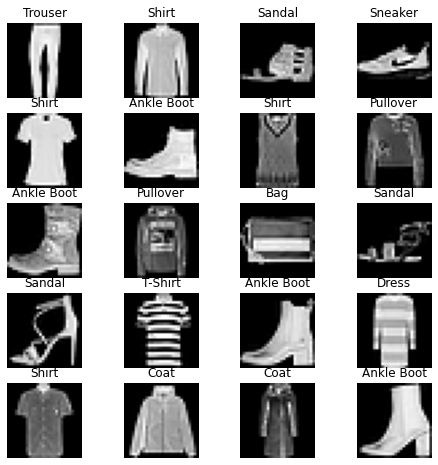

In [18]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

drawer = Drawer(dataset=test_data, label_names=labels_map)
drawer.plot()

## <span style="color:black">Puesta en producción</span>


Nuestro modelo está entrenado (con una exactitud del 64\%). Por supuesto podemos mejorar mucho esta exactitud, pero de momento lo dejaremos así. Si se pregunta porque tiene una exactitud tan baja, tenga en cuenta que hemos usado un perceptron muy simple. Para este caso, un modelo convolucional irá mucho mejor.


Vamos a recuperar el mejor modelo obtenido. Los puntos de chequeo los tenemos guardados, por lo que será muy fácil saber cuál es el mejor modelo. Lo cargaremos a una red nueva y haremos algunas predicciones.

In [20]:
from torch.nn.functional import softmax

class Predictor:
    def __init__(self, model, checkpoint):
        self.model = model
        self.model.load_state_dict(torch.load(checkpoint))
    
    def predict(self, data):
        out = self.model(data)
        pred = softmax(out, dim=-1)
        return pred.detach().numpy()

In [22]:
# Baja los datos test data de open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 10

#crea un data loader
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print('X[N, C, H, W]: ', X.shape)
    print('Shape of y: ', y.shape, y.dtype)
    break# Baja los datos test data de open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 10

#crea un data loader
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print('X[N, C, H, W]: ', X.shape)
    print('Shape of y: ', y.shape, y.dtype)
    break

X[N, C, H, W]:  torch.Size([10, 1, 28, 28])
Shape of y:  torch.Size([10]) torch.int64
X[N, C, H, W]:  torch.Size([10, 1, 28, 28])
Shape of y:  torch.Size([10]) torch.int64
